In [1]:
# torch imports
import torch
# Misc imports
import os 
import sys
import seaborn as sns
from pathlib import Path
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')
# Ionpy imports
from ionpy.util import Config
from ionpy.analysis import ResultsLoader

# Define some useful paths.
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
       '/storage'
))
# Set some defaults
rs = ResultsLoader()
sns.set_style("darkgrid")
torch.set_printoptions(linewidth=200)

# For using code without restarting.
%load_ext autoreload
%autoreload 2
# For using yaml configs.
%load_ext yamlmagic

In [2]:
%%yaml default_cfg 

experiment:
    exp_root: '?'
    inference_seed: 40
    hard_pred_threshold: 0.5 

log:
    root: '?'
    log_interval: 10 
    log_image_stats: True 
    log_pixel_stats: False 
    gether_inference_stats: True
    summary_compute_global_metrics: False 

dataloader:
    batch_size: '?'
    num_workers: 1 
    pin_memory: True 

<IPython.core.display.Javascript object>

In [3]:
%%yaml calibration_cfg 

calibrator:
    _name: None 

local_calibration:
    num_prob_bins: 15
    neighborhood_width: 3

global_calibration:
    num_classes: '?' 
    num_prob_bins: 15
    neighborhood_width: 3

<IPython.core.display.Javascript object>

In [4]:
%%yaml model_cfg 

# For standard datasets
#####################################
data:
    preload: False 

model:
    pred_label: '?' 
    _type: "standard"
    pretrained_exp_root : None
    ## Use For Uncalibrated
    # checkpoint: 'max-val-dice_score'
    ## Use For Calibrated 
    checkpoint: 'min-val-ece_loss'

<IPython.core.display.Javascript object>

## Gather Inference Options.

In [5]:
%%yaml experiment_cfg 

# Use this field if you want to call it something else beyond the base_model_dir.
name: "ACDC_AllCalibrators_AcrossNumExamples"


base_model: 
    # - "/storage/vbutoi/scratch/ESE/training/07_09_24_ACDC_SoftDiceLoss"
    - "/storage/vbutoi/scratch/ESE/training/07_09_24_ACDC_PixelCELoss_wSVLS" # TODO : DROP AUG
    # - "/storage/vbutoi/scratch/ESE/calibration/07_23_24_ACDC_CalibrationSuite_TempScaling_HardGT"
    # - "/storage/vbutoi/scratch/ESE/calibration/07_23_24_ACDC_CalibrationSuite_IBTS_HardGT"
    # - "/storage/vbutoi/scratch/ESE/calibration/07_23_24_ACDC_CalibrationSuite_LTS_HardGT"
    # - "/storage/vbutoi/scratch/ESE/calibration/07_23_24_ACDC_CalibrationSuite_Popcorn_HardGT"

data:
    _class: "ese.experiment.datasets.ACDC"
    split: "val"
    label_threshold: null # Need to compare with non-noisy gt.

dataloader:
    batch_size: 8

<IPython.core.display.Javascript object>

In [6]:
# Local imports
from ese.analysis.analysis_utils.submit_utils import get_ese_inference_configs

# Get the configs for the different runs.
base_cfg = Config(default_cfg).update([calibration_cfg, model_cfg])
# Get the different experiment cfg yamls.
inf_cfgs = get_ese_inference_configs(
    exp_cfg=experiment_cfg, 
    base_cfg=base_cfg
)

In [7]:
len(inf_cfgs)

32

## Running Jobs

In [8]:
from ese.analysis.run_inference import get_cal_stats

/local/vbutoi/envs/UniverSegTF/lib/python3.9/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_outputs" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


Set seed: 40


Intel MKL extensions not available for NumPy

Using slow Pillow instead of Pillow-SIMD

Set seed: 41


Intel MKL extensions not available for NumPy

Using slow Pillow instead of Pillow-SIMD

Loading checkpoint: max-val-dice_score.
Loading checkpoint: min-val-ece_loss.
Running:

calibrator:
  _name: None
data:
  _class: ese.experiment.datasets.ACDC
  input_type: image
  label_threshold: null
  preload: false
  return_gt_proportion: true
  split: val
  version: 0.1
dataloader:
  batch_size: 8
  num_workers: 1
  pin_memory: true
dataset:
  _class: ese.datasets.ACDC
  augmentations: null
  label_threshold: null
  preload: false
  return_data_id: true
  return_gt_proportion: true
  split: val
  version: 0.1
experiment:
  dataset_name: ACDC
  exp_name: ACDC_AllCalibrators_AcrossNumExamples
  exp_root: /storage/vbutoi/scratch/ESE/inference/07_24_24_ACDC_AllCalibrators_AcrossNumExamples
  hard_pred_threshold: 0.5
  inference_seed: 40
  model_dir: /storage/vbutoi/scratch/ESE/calibration/07_23_24_ACDC_CalibrationSuite_Popcorn_HardGT/20240723_211628-R8EH-6f54b09eacf3e32f66849f5db78ef88b
  pretrained_seed: 41
global_cal_metrics:
- ECE:
    _fn: ese.metrics.calibration.ece_loss
    cal

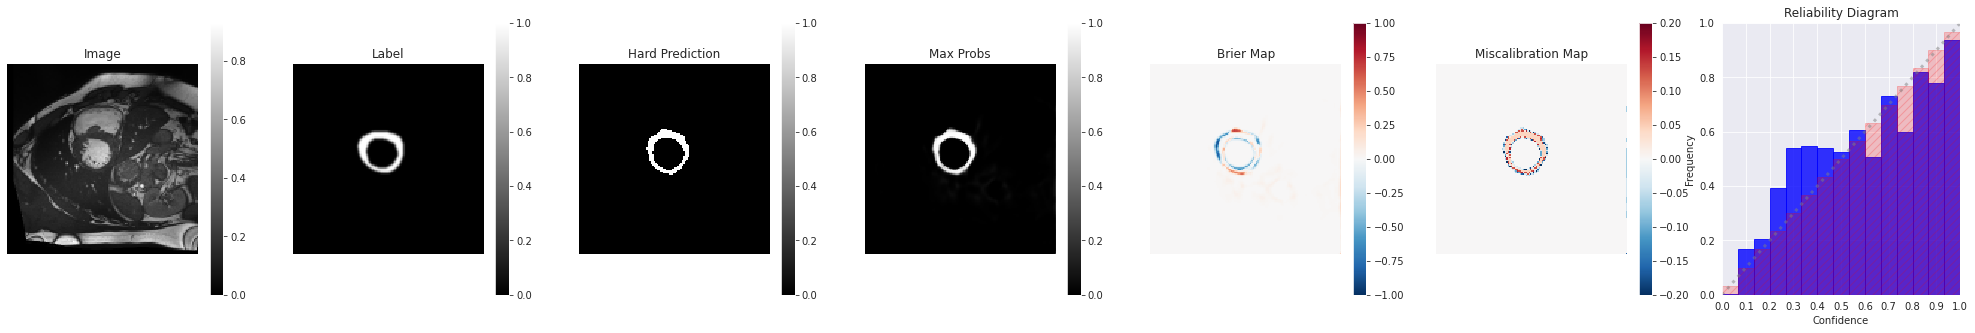

METRICS: 
--------
Dice: 0.840255618095398
HD95: 3.8422205448150635
BoundaryIOU: 0.11224489659070969
SoftVolumeError: 2.496124267578125
HardVolumeError: -41.0
Image_ECE: 0.0022193548459922396

VOLUMES: 
--------
{'gt_volume': 335.0,
 'hard_proportion': 0.0179443359375,
 'hard_volume': 294.0,
 'new_gt_proportion': 0.02044677734375,
 'soft_proportion': 0.020599128678441048,
 'soft_volume': 337.4961242675781}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': '',
 'data_id': 'patient025',
 'gt_proportion': 0.02044677734375,
 'label_idx': -1}
--------------------------------------------------------------------------



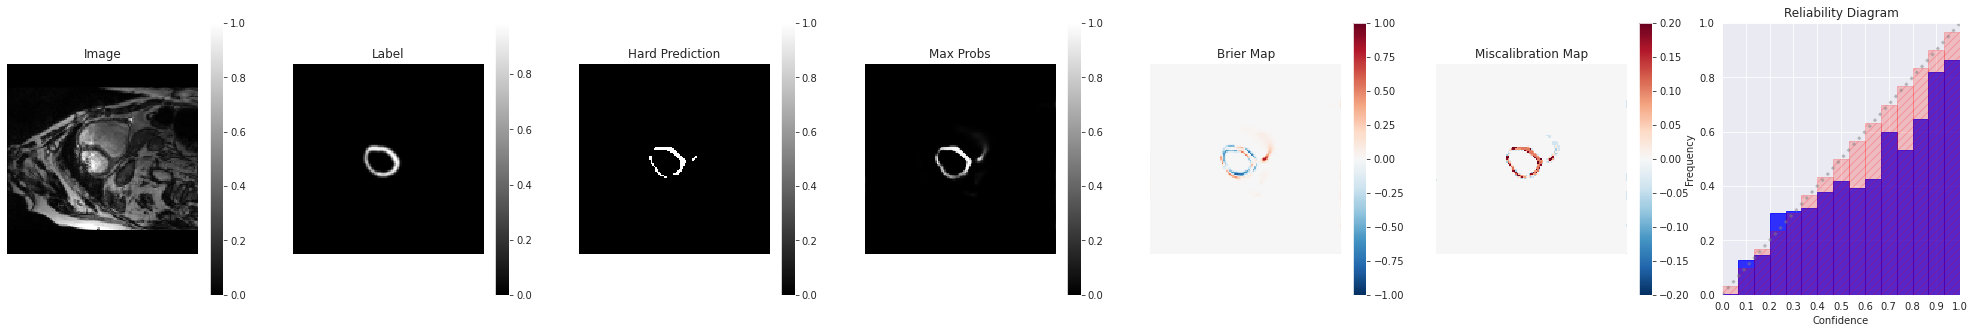

METRICS: 
--------
Dice: 0.7175572514533997
HD95: 3.605551242828369
BoundaryIOU: 8.474576596029237e-10
SoftVolumeError: 1.4951324462890625
HardVolumeError: -30.5
Image_ECE: 0.002122680624187267

VOLUMES: 
--------
{'gt_volume': 148.5,
 'hard_proportion': 0.0072021484375,
 'hard_volume': 118.0,
 'new_gt_proportion': 0.009063720703125,
 'soft_proportion': 0.009154976345598698,
 'soft_volume': 149.99513244628906}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': '',
 'data_id': 'patient086',
 'gt_proportion': 0.009063720703125,
 'label_idx': -1}
--------------------------------------------------------------------------



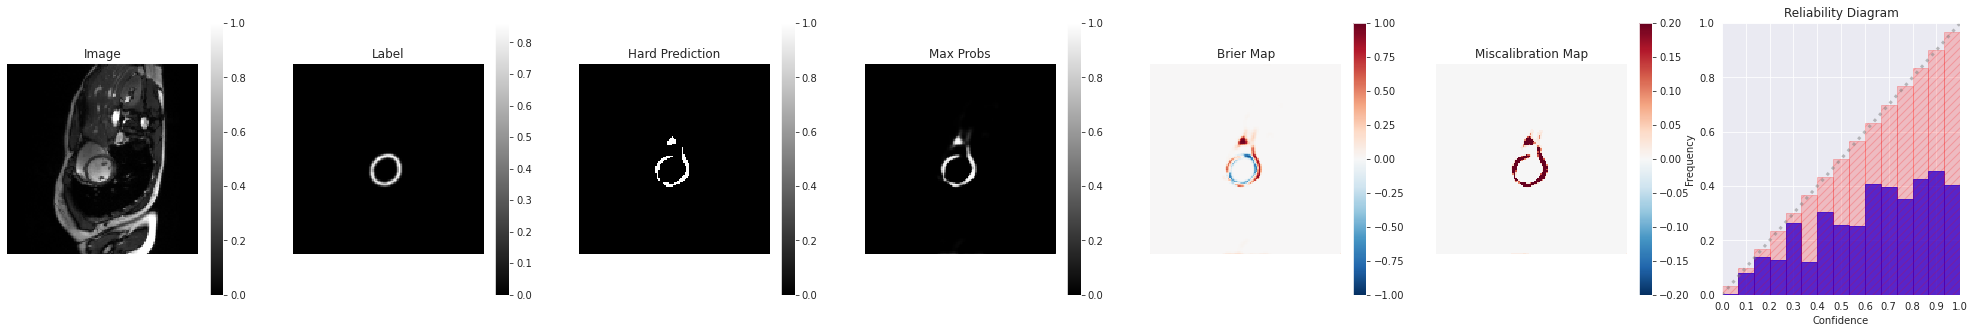

METRICS: 
--------
Dice: 0.5057471394538879
HD95: 5.09406852722168
BoundaryIOU: 6.666666663157628e-10
SoftVolumeError: 60.04719543457031
HardVolumeError: 34.5
Image_ECE: 0.005641651403762926

VOLUMES: 
--------
{'gt_volume': 115.5,
 'hard_proportion': 0.0091552734375,
 'hard_volume': 150.0,
 'new_gt_proportion': 0.007049560546875,
 'soft_proportion': 0.010714550502598286,
 'soft_volume': 175.5471954345703}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': '',
 'data_id': 'patient068',
 'gt_proportion': 0.007049560546875,
 'label_idx': -1}
--------------------------------------------------------------------------



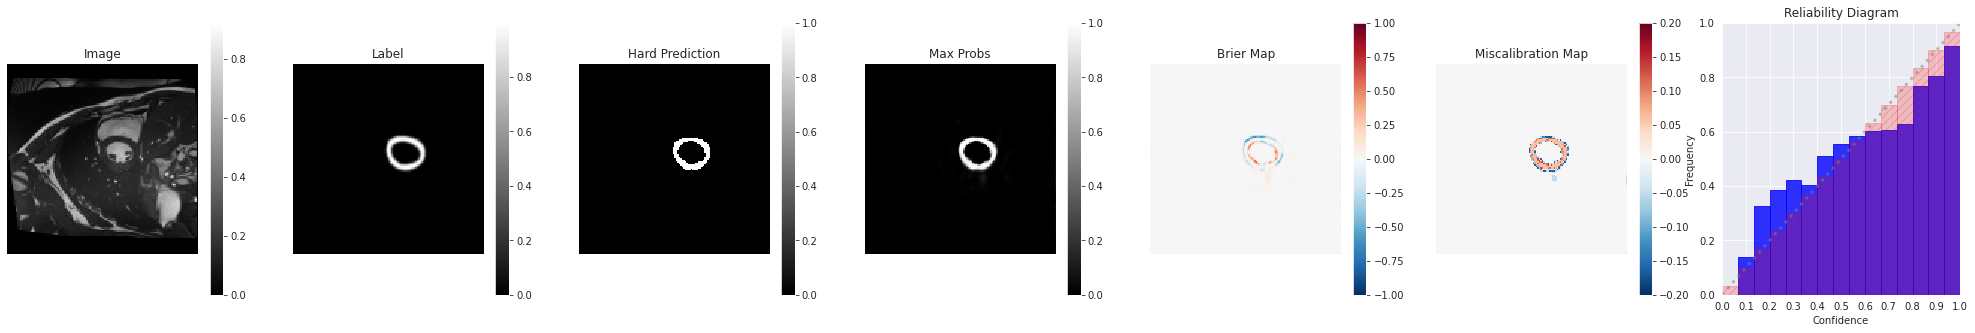

METRICS: 
--------
Dice: 0.8820960521697998
HD95: 3.0
BoundaryIOU: 4.4843048718767875e-10
SoftVolumeError: 10.57586669921875
HardVolumeError: -15.0
Image_ECE: 0.002169990830445605

VOLUMES: 
--------
{'gt_volume': 238.0,
 'hard_proportion': 0.01361083984375,
 'hard_volume': 223.0,
 'new_gt_proportion': 0.0145263671875,
 'soft_proportion': 0.015171866863965988,
 'soft_volume': 248.57586669921875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': '',
 'data_id': 'patient064',
 'gt_proportion': 0.0145263671875,
 'label_idx': -1}
--------------------------------------------------------------------------



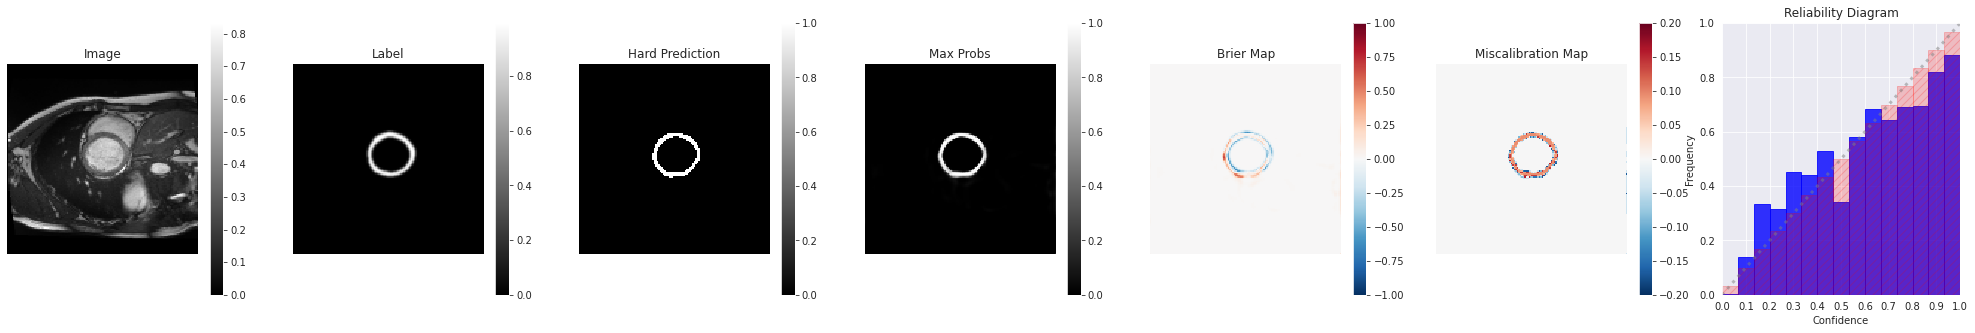

METRICS: 
--------
Dice: 0.83984375
HD95: 3.0
BoundaryIOU: 4.098360817383906e-10
SoftVolumeError: -2.9757080078125
HardVolumeError: -22.0
Image_ECE: 0.002776149099095184

VOLUMES: 
--------
{'gt_volume': 266.0,
 'hard_proportion': 0.014892578125,
 'hard_volume': 244.0,
 'new_gt_proportion': 0.0162353515625,
 'soft_proportion': 0.016053728759288788,
 'soft_volume': 263.0242919921875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': '',
 'data_id': 'patient019',
 'gt_proportion': 0.0162353515625,
 'label_idx': -1}
--------------------------------------------------------------------------



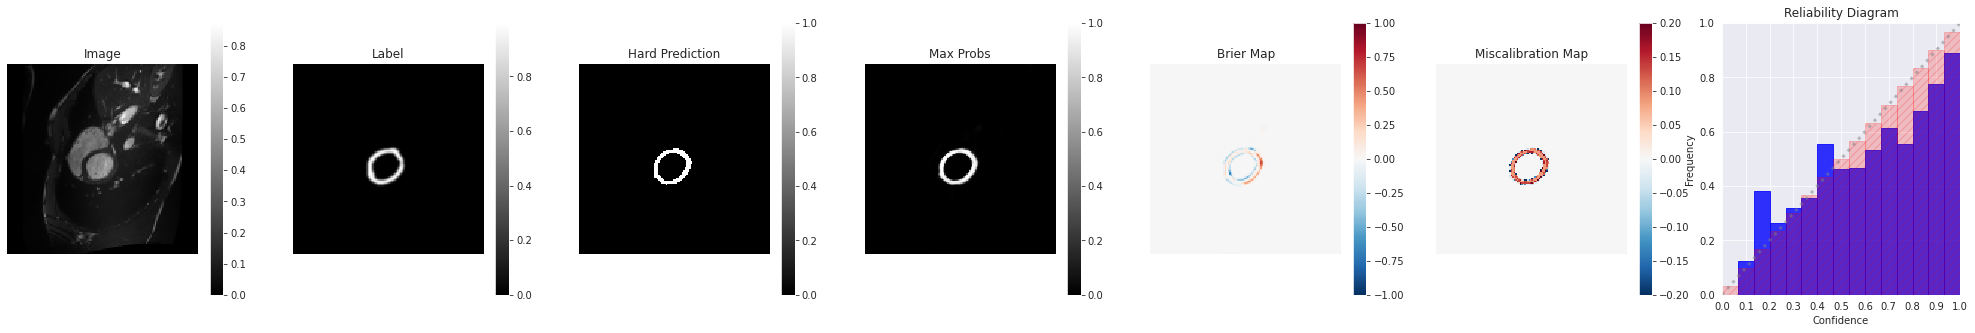

METRICS: 
--------
Dice: 0.8784118890762329
HD95: 3.0
BoundaryIOU: 4.926108410074903e-10
SoftVolumeError: 7.376007080078125
HardVolumeError: -1.0
Image_ECE: 0.002314761156029436

VOLUMES: 
--------
{'gt_volume': 204.0,
 'hard_proportion': 0.01239013671875,
 'hard_volume': 203.0,
 'new_gt_proportion': 0.012451171875,
 'soft_proportion': 0.012901367619633675,
 'soft_volume': 211.37600708007812}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': '',
 'data_id': 'patient067',
 'gt_proportion': 0.012451171875,
 'label_idx': -1}
--------------------------------------------------------------------------



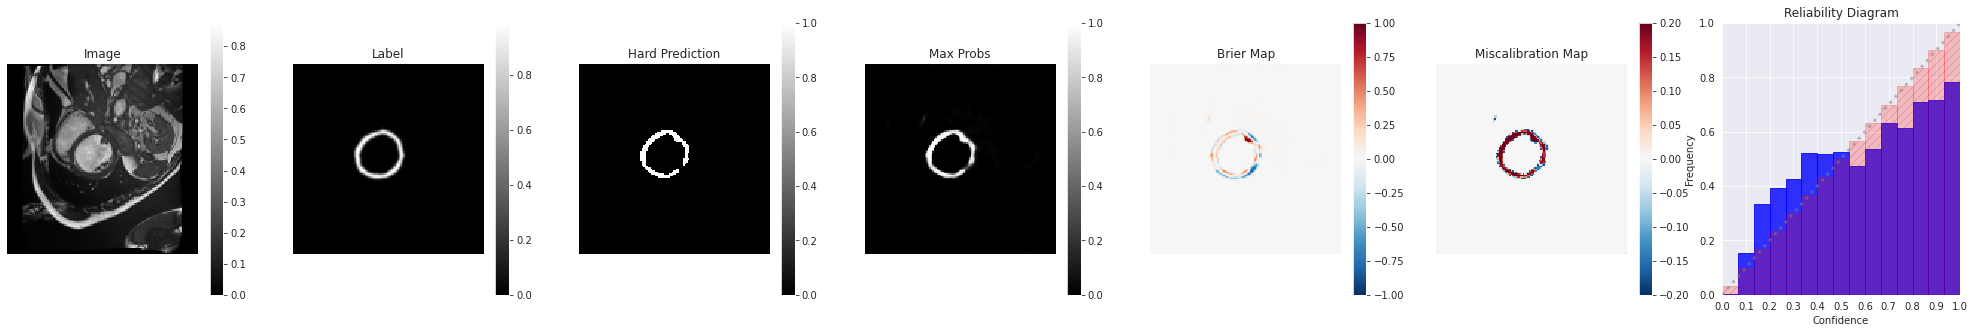

METRICS: 
--------
Dice: 0.800000011920929
HD95: 3.1622776985168457
BoundaryIOU: 3.816793825439646e-10
SoftVolumeError: 22.594818115234375
HardVolumeError: -5.25
Image_ECE: 0.00373406445443353

VOLUMES: 
--------
{'gt_volume': 267.25,
 'hard_proportion': 0.0159912109375,
 'hard_volume': 262.0,
 'new_gt_proportion': 0.0163116455078125,
 'soft_proportion': 0.01769072376191616,
 'soft_volume': 289.8448181152344}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_str': '',
 'data_id': 'patient014',
 'gt_proportion': 0.0163116455078125,
 'label_idx': -1}
--------------------------------------------------------------------------



KeyboardInterrupt: 

In [9]:
from ese.experiment import run_ese_exp

###### Run individual jobs
run_ese_exp(
    config=inf_cfgs[0], 
    job_func=get_cal_stats,
    run_name='debug',
    # run_name=exp_name,
    show_examples=True,
    gpu='0',
    # gpu='4',
) 

In [ ]:
# from ese.experiment import submit_ese_exps 

# #### Run Batch Jobs
# submit_ese_exps(
#     config_list=inf_cfgs,
#     job_func=get_cal_stats,
#     available_gpus=['0', '1', '2', '3']
#     # available_gpus=['4', '5', '6', '7']
# )